In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def sir(y, t, N, alpha1, alpha2, beta, beta1, gamma, gamma1, delta1, delta2):
    S, I, R, D = y
    dSdt = gamma1*R-beta1*(1-beta)*S*I/N-gamma*S
    dIdt = beta1*(1-beta)*S*I/N-alpha1*beta*I-alpha2*(1-beta)*I-delta1*I-delta2*I
    dRdt = alpha1*beta*I+alpha2*(1-beta)*I+gamma*S-gamma1*R
    dMdt = delta1*I+delta2*I
    return dSdt, dIdt, dRdt, dMdt

In [3]:
N = 10000
alpha1 = 0.4
alpha2 = 0.25
beta = 0.3
beta1 =230
gamma = 0.15
gamma1 = 0.25
delta1 = 0.3
delta2 = 0.75
I0 = 1
R0 = 0
M0 = 0
S0 = N - I0 - R0 - M0

t = np.linspace(0, 16,1000)

y0 = S0, I0, R0, M0
ret = odeint(sir, y0, t, args=(N, alpha1, alpha2, beta, beta1, gamma, gamma1, delta1, delta2))
S, I, R, M = ret.T

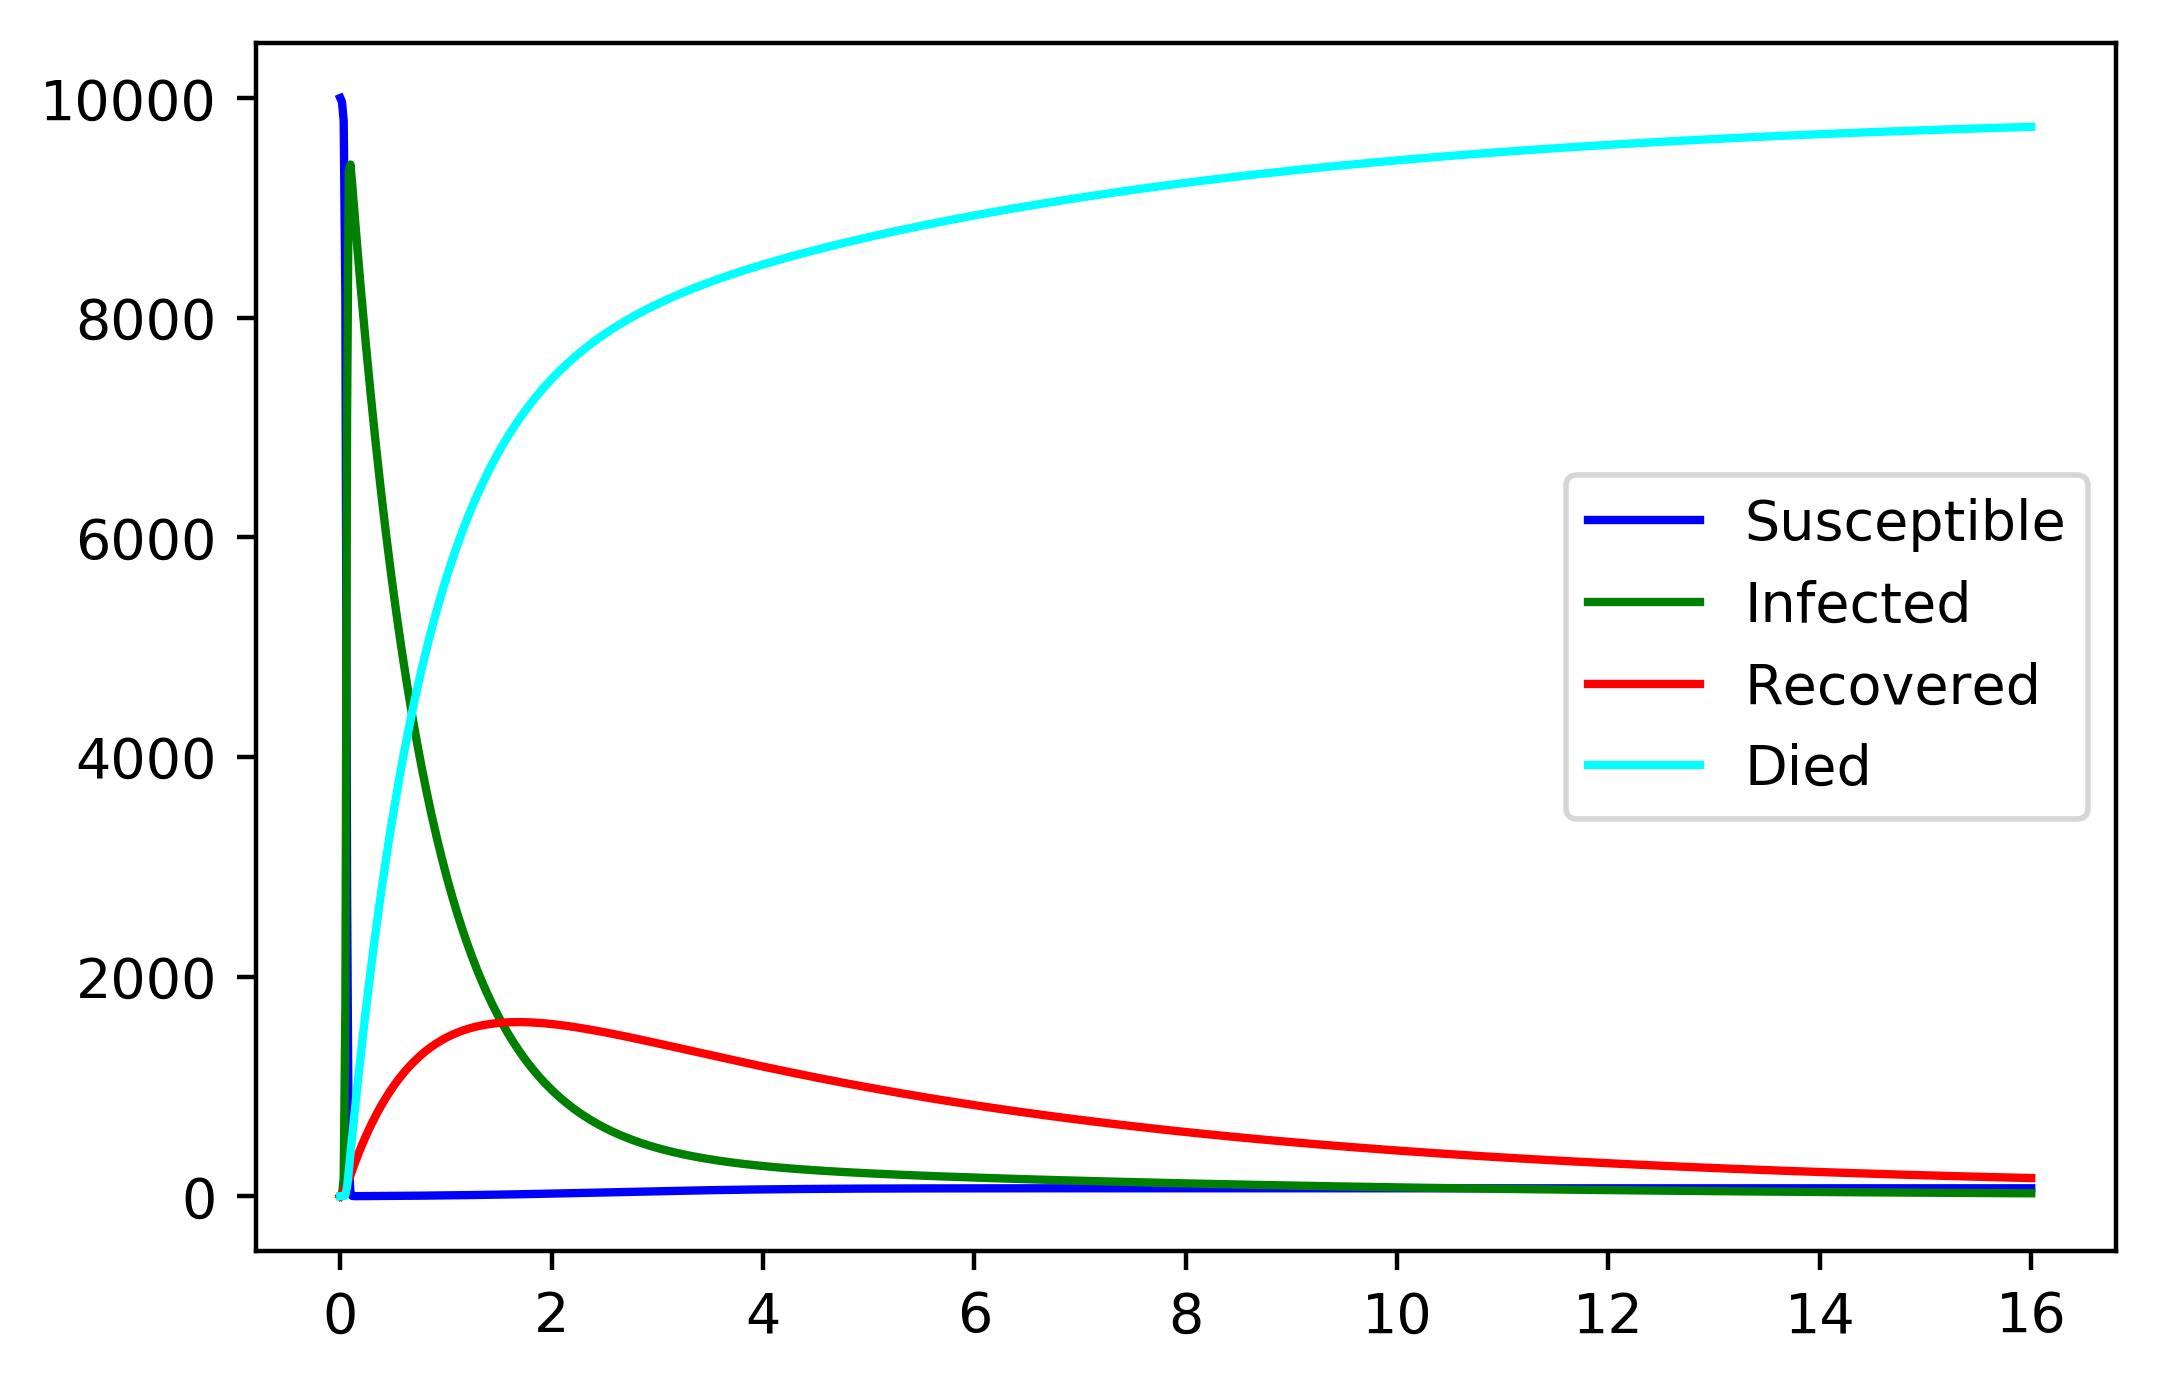

In [4]:
plt.figure(dpi=400)
plt.plot(t,S,color="blue",label="Susceptible")
plt.plot(t,I,color="green",label="Infected")
plt.plot(t,R,color="red",label="Recovered")
plt.plot(t,M,color="cyan",label="Died")
plt.legend()
plt.show()

In [5]:
markov=np.array([[0.05,0.95,0.0,0.0],
                 [0.0,0.4,0.5,0.1],
                 [0.0,0.0,1.0,0.0],
                 [0.0,0.0,0.0,1.0]])

In [6]:
x0=np.array([9999,1,0,0])

In [7]:
res=np.zeros((16,4))

In [8]:
res[0]=x0
for i in range(1,16):
    x0=np.dot(x0,markov)
    res[i]=x0

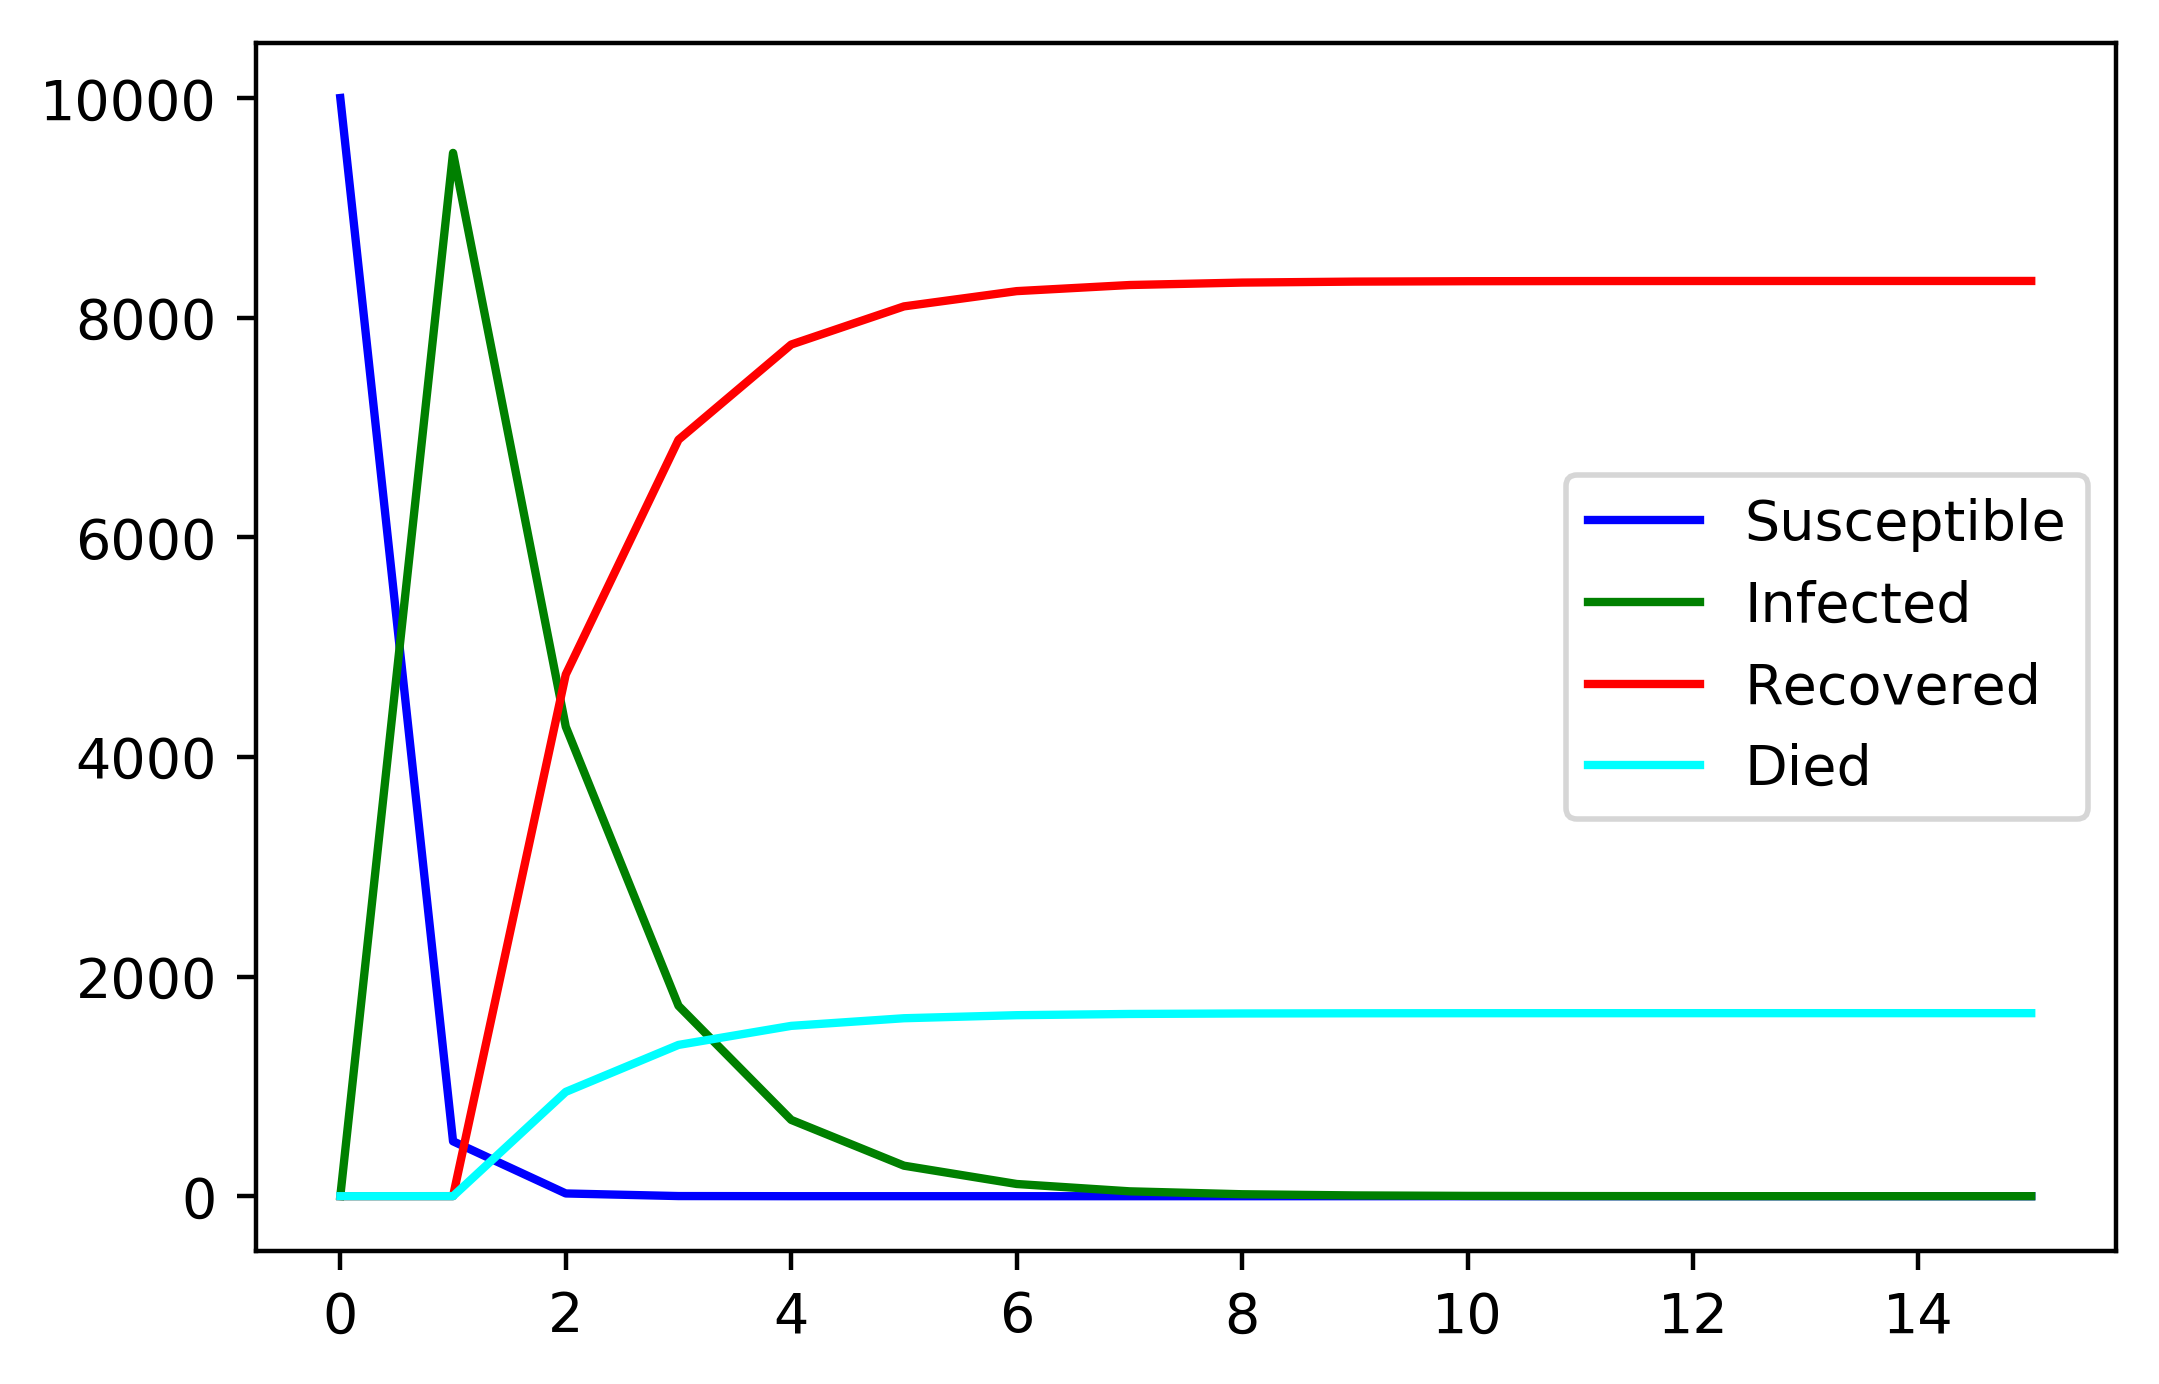

In [9]:
plt.figure(dpi=400)
plt.plot(res[:,0],label="Susceptible",color="blue")
plt.plot(res[:,1],label="Infected",color="green")
plt.plot(res[:,2],label="Recovered",color="red")
plt.plot(res[:,3],label="Died",color="cyan")
plt.legend()
plt.show()